# Encoding Categorical Data 

- Since most machine learning models only accept numerical variables, preprocessing the categorical variables becomes a necessary step. We need to convert these categorical variables to numbers such that the model is able to understand and extract valuable information.

# What is categorical data?

- Categorical data is a collection of information that is divided into groups according to the variables present in the data.
- Categorical variables are usually represented as ‘strings’ or ‘categories’ and are finite in number.



## kinds of categorical data

1. Nominal Data: The categories do not have an inherent order 
2. Ordinal Data: The categories have an inherent order



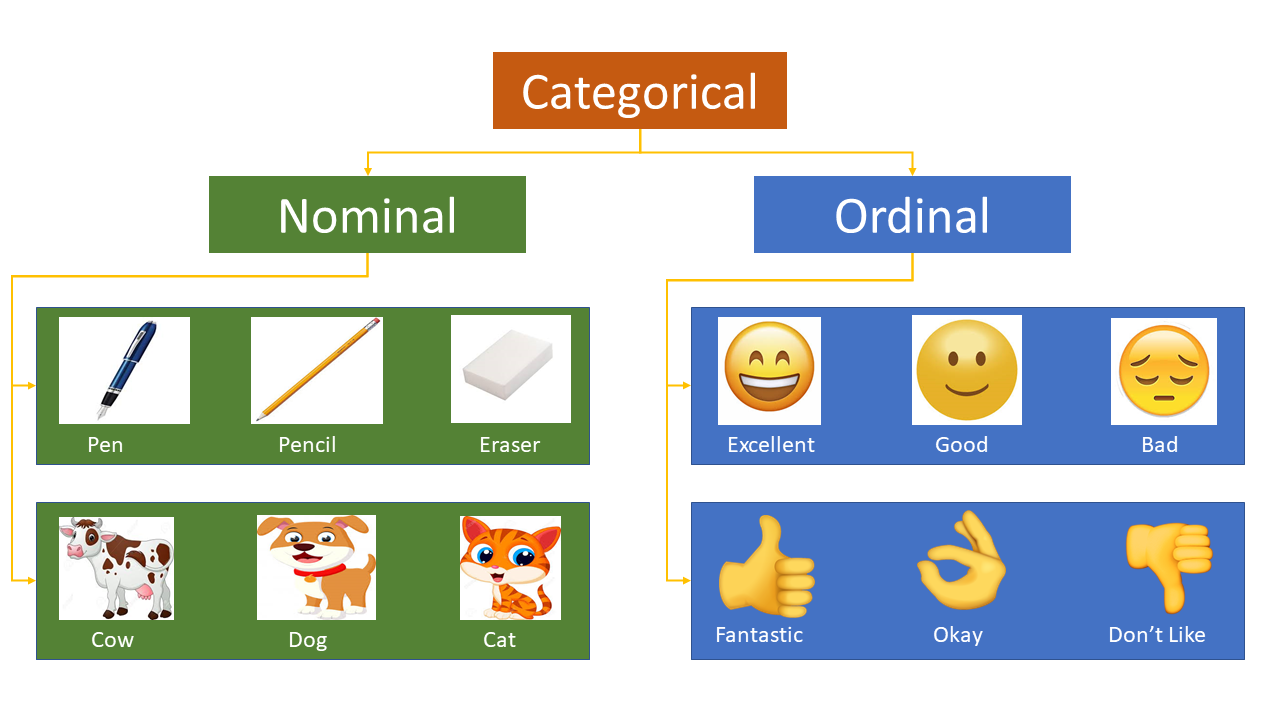

In [18]:
from PIL import Image
image = Image.open('Categorical.png')
image


### Nominal Data:
- The city where a person lives: Delhi, Mumbai, Ahmedabad, Bangalore, etc.
- The department a person works in: Finance, Human resources, IT, Production.

While encoding Nominal data, we have to consider the presence or absence of a feature. In such a case, no notion of order is present. For example, the city a person lives in. For the data, it is important to retain where a person lives. Here, We do not have any order or sequence. It is equal if a person lives in Delhi or Bangalore.

### Ordinal Data :
- The highest degree a person has: High school, Diploma, Bachelors, Masters, PhD.
- The grades of a student:  A+, A, B+, B, B- etc.

In Ordinal data, while encoding, one should retain the information regarding the order in which the category is provided. Like in the above example the highest degree a person possesses, gives vital information about his qualification. The degree is an important feature to decide whether a person is suitable for a post or not.


# To discover them, we will see the following ways to encode categorical variables:

1. One-hot or dummy encoding
2. Label Encoding or Ordinal Encoding
3. Target encoding or Mean Encode
4. Count Or Frequency Encoding
5. HashingEncoder
6. Binary Encoding
7. Base N Encoding

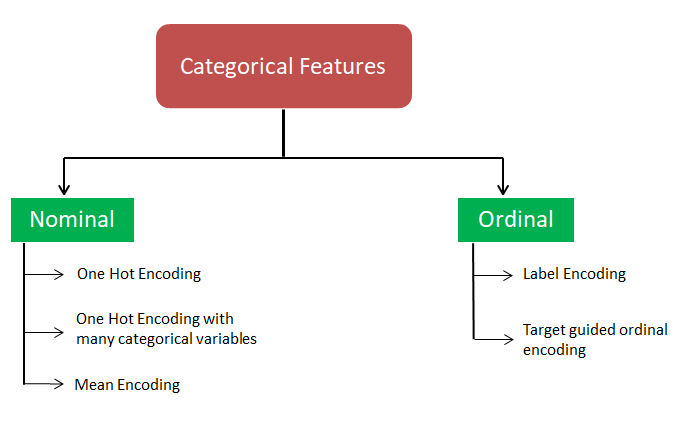

In [49]:
from PIL import Image
image_1 = Image.open('Nominal vs Ordinal.png')
image_1

# 1. One-Hot Encoding 
In One-Hot Encoding, each category of any categorical variable gets a new variable. It maps each category with binary numbers (0 or 1). This type of encoding is used when the data is nominal. Newly created binary features can be considered dummy variables. After one hot encoding, the number of dummy variables depends on the number of categories presented in the data.

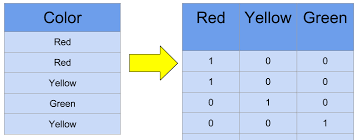

In [50]:
image_1 = Image.open('onehotencoding.png')
image_1

In [2]:
import pandas as pd
import numpy as np

In [25]:
# Creating a categorical column
df = pd.DataFrame({'colors': ['red','green','blue','yellow']})

In [26]:
# checking the dataset
df

,colors
0,red
1,green
2,blue
3,yellow


## we can perform One Hot Encoding in two ways

- One Hot Encoding using Sci-kit learn Library
- One-Hot encoding using get_dummies() 

### One Hot Encoding using Sci-kit learn Library


In [42]:
# importing neccessary libraries

from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()

In [50]:
# applying one hot encoder with sparse matrix and creating an instance
colors_1hot = onehot_encoder.fit_transform(df[['colors']].values).toarray()

In [51]:
# encoded colors column
colors_1hot

array([[0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.]])

In [54]:
# converting array to DataFrame
colors_1hot_DF = pd.DataFrame(colors_1hot)

In [58]:
# converting a dtype
df['colors']=df['colors'].astype('category')

#Assigning numerical values and storing it in another columns
df['colors_new']=df['colors'].cat.codes


In [59]:
# Colors_new consists with encoded codes wrt each category
df

,colors,colors_new
0,red,2
1,green,1
2,blue,0
3,yellow,3


In [60]:
#Merge colors_1hot_DF(encoded df) with main-df
df1=df.join(colors_1hot_DF)
print(df1)

   colors  colors_new    0    1    2    3
0     red           2  0.0  0.0  1.0  0.0
1   green           1  0.0  1.0  0.0  0.0
2    blue           0  1.0  0.0  0.0  0.0
3  yellow           3  0.0  0.0  0.0  1.0


### One-Hot encoding the categorical parameters using get_dummies() 

In [63]:
data = pd.DataFrame({'colors': ['red','green','blue','yellow']})

In [64]:
one_hot_encoded_data = pd.get_dummies(data, columns = ['colors'])
print(one_hot_encoded_data)

   colors_blue  colors_green  colors_red  colors_yellow
0            0             0           1              0
1            0             1           0              0
2            1             0           0              0
3            0             0           0              1


In [66]:
d1 = data.copy()

In [68]:
# converting a dtype
d1['colors']=d1['colors'].astype('category')

#Assigning numerical values and storing it in another columns
d1['colors_new']=d1['colors'].cat.codes


In [70]:
print(d1)

   colors  colors_new
0     red           2
1   green           1
2    blue           0
3  yellow           3


In [71]:
#Merge colors_1hot_DF(encoded df) with main-df
d1_=d1.join(one_hot_encoded_data)
print(d1_)

   colors  colors_new  colors_blue  colors_green  colors_red  colors_yellow
0     red           2            0             0           1              0
1   green           1            0             1           0              0
2    blue           0            1             0           0              0
3  yellow           3            0             0           0              1


# 2. Label Encoding or Ordinal Encoding
This type of encoding is used when the variables in the data are ordinal, ordinal encoding converts each label into integer values and the encoded data represents the sequence of labels.

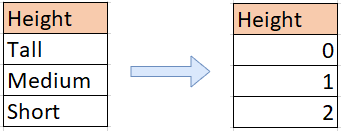

In [52]:
image_1 = Image.open('label encoding.png')
image_1

In [77]:
# importing neccessary libraries

from sklearn.preprocessing import OrdinalEncoder
Ordinal_Encoder = OrdinalEncoder()

In [139]:

degree_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors',
                           'Masters','Phd','High school','High school']})

In [140]:
degree_df

,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


In [160]:
degree_df.Degree.value_counts()

High school    3
Bachelors      2
Masters        2
Diploma        1
Phd            1
Name: Degree, dtype: int64

In [142]:
degree_df_encoded = Ordinal_Encoder.fit_transform(degree_df.values)

In [143]:
degree_df_encoded

array([[2.],
       [3.],
       [1.],
       [0.],
       [0.],
       [3.],
       [4.],
       [2.],
       [2.]])

In [144]:
from sklearn.preprocessing import LabelEncoder
Label_Encoder = LabelEncoder()

In [145]:
degree_df['Degree_label'] = Label_Encoder.fit_transform(degree_df['Degree'])

In [146]:
degree_df

,Degree,Degree_label
0,High school,2
1,Masters,3
2,Diploma,1
3,Bachelors,0
4,Bachelors,0
5,Masters,3
6,Phd,4
7,High school,2
8,High school,2


############## Trying to label as per the degree level using Ordinal Encoding  ###############

In [125]:
!pip install category_encoders

In [3]:
import category_encoders as ce

In [154]:

Education_df=pd.DataFrame({'Degree':['High school','Masters','Diploma','Bachelors','Bachelors',
                           'Masters','Phd','High school','High school']})

In [155]:
Education_df

,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


In [156]:
encoder= ce.OrdinalEncoder(cols=['Degree'],return_df=True,
                           mapping=[{'col':'Degree','mapping':{'None':0,'High school':1,'Diploma':2,'Bachelors':3,
                                     'Masters':4,'Phd':5}}])

In [157]:
Education_df

,Degree
0,High school
1,Masters
2,Diploma
3,Bachelors
4,Bachelors
5,Masters
6,Phd
7,High school
8,High school


In [158]:
Education_df['transformed'] = encoder.fit_transform(Education_df)

In [159]:
Education_df

,Degree,transformed
0,High school,1
1,Masters,4
2,Diploma,2
3,Bachelors,3
4,Bachelors,3
5,Masters,4
6,Phd,5
7,High school,1
8,High school,1


# 3. Target encoding or Mean Encode
- Target encoding is a Baysian encoding technique.

- Bayesian encoders use information from dependent/target variables to encode the categorical data.

- In target encoding, we calculate the mean of the target variable for each category and replace the category variable with the mean value. In the case of the categorical target variables, the posterior probability of the target replaces each category..

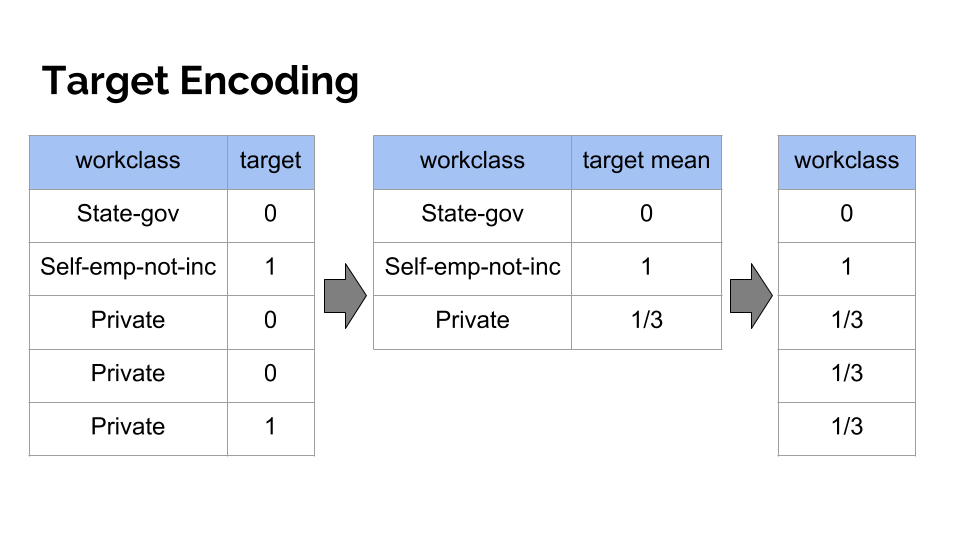

In [53]:
image_1 = Image.open('Targetencoding.png')
image_1

In [11]:
import numpy as np
import pandas as pd
import category_encoders as ce
# from sklearn.preprocessing import TargetEncoder

In [31]:
df1=pd.DataFrame({'name':['rahul','ashok','ankit','rahul','ashok','ankit'],
                 'marks' : [10,20,30,60,70,80,]})

In [32]:
df1

,name,marks
0,rahul,10
1,ashok,20
2,ankit,30
3,rahul,60
4,ashok,70
5,ankit,80


In [33]:
mean_encode = df1.groupby('name')['marks'].mean()
df1.loc[:,'name_mean_enc']=df1['name'].map(mean_encode)
df1

,name,marks,name_mean_enc
0,rahul,10,35
1,ashok,20,45
2,ankit,30,55
3,rahul,60,35
4,ashok,70,45
5,ankit,80,55


In [17]:
#Creating the Dataframe

df=pd.DataFrame({'name':['rahul','ashok','ankit','rahul','ashok','ankit'],
                 'marks' : [10,20,30,60,70,80,]})

In [18]:
df

,name,marks
0,rahul,10
1,ashok,20
2,ankit,30
3,rahul,60
4,ashok,70
5,ankit,80


### using Target encoder

In [19]:
#Create target encoding object
encoder=ce.TargetEncoder(cols='name')

C:\Users\MANOHAR\anaconda3\lib\site-packages\category_encoders\target_encoder.py:92: FutureWarning: Default parameter min_samples_leaf will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter min_samples_leaf will change in version 2.6."
C:\Users\MANOHAR\anaconda3\lib\site-packages\category_encoders\target_encoder.py:97: FutureWarning: Default parameter smoothing will change in version 2.6.See https://github.com/scikit-learn-contrib/category_encoders/issues/327
  warnings.warn("Default parameter smoothing will change in version 2.6."


In [20]:
#Original Data
df

,name,marks
0,rahul,10
1,ashok,20
2,ankit,30
3,rahul,60
4,ashok,70
5,ankit,80


In [21]:
df.columns

Index(['name', 'marks'], dtype='object')

In [23]:
encoder.fit_transform(df['name'],df['marks'])

,name
0,37.689414
1,45.000000
2,52.310586
3,37.689414
4,45.000000
5,52.310586


### Observation
Here we can see the names of students are changed with the mean of their marks. This is a good method for encoding: using this we can encode any number of categories. But it can cause the overfitting of any model because we are using mean as a category and this generates a hard correlation between these features.

Using this we can train the model but in testing, it can lead to the failure or inaccuracy of the model.

# 4. Count Or Frequency Encoding

- Count or frequency encoding: Replace the categories by the count of the observations that show that category in the dataset. Similarly, we can replace the category by the frequency -or percentage- of observations in the dataset.

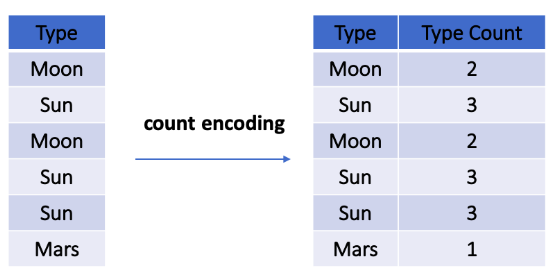

In [54]:
image_1 = Image.open('countencoding.png')
image_1

In [26]:
data= {'Temperature': ['Hot', 'Cold', 'Very Hot', 'Warm', 'Hot', 'Warm', 'Warm', 'Hot', 'Hot', 'Cold'],
      'Color': ['Red', 'Yellow', 'Blue', 'Blue', 'Red', 'Yellow', 'Red', 'Yellow', 'Yellow', 'Yellow'],
      'Target': [1,1,1,0,1,0,1,0,1,1]}

df =  pd.DataFrame(data, columns = ['Temperature', 'Color', 'Target'])

In [27]:
df

,Temperature,Color,Target
0,Hot,Red,1
1,Cold,Yellow,1
2,Very Hot,Blue,1
3,Warm,Blue,0
4,Hot,Red,1
5,Warm,Yellow,0
6,Warm,Red,1
7,Hot,Yellow,0
8,Hot,Yellow,1
9,Cold,Yellow,1


#### It is a way to utilize the frequency of the categories as labels. In the cases where the frequency is related somewhat to the target variable, it helps the model understand and assign the weight in direct and inverse proportion, depending on the nature of the data. Three-step for this :

- Select a categorical variable you would like to transform
- Group by the categorical variable and obtain counts of each category
- Join it back with the training dataset

In [28]:
freq = df.groupby('Temperature').size()/len(df)

In [29]:
df.loc[:,'Temp_freq_encode'] = df['Temperature'].map(freq)

In [30]:
df

,Temperature,Color,Target,Temp_freq_encode
0,Hot,Red,1,0.4
1,Cold,Yellow,1,0.2
2,Very Hot,Blue,1,0.1
3,Warm,Blue,0,0.3
4,Hot,Red,1,0.4
5,Warm,Yellow,0,0.3
6,Warm,Red,1,0.3
7,Hot,Yellow,0,0.4
8,Hot,Yellow,1,0.4
9,Cold,Yellow,1,0.2


# 5. HashingEncoder

Just like one-hot encoding, the Hash encoder represents categorical features using the new dimensions. Here, the user can fix the number of dimensions after transformation using n_component argument. Here is what I mean – A feature with 5 categories can be represented using N new features similarly, a feature with 100 categories can also be transformed using N new features. Doesn’t this sound amazing?

By default, the Hashing encoder uses the md5 hashing algorithm but a user can pass any algorithm of his choice. If you want to explore the md5 algorithm

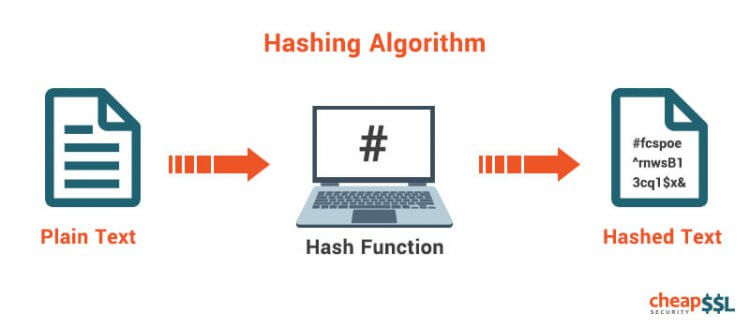

In [56]:
image_1 = Image.open('hashing-function.jpg')
image_1

In [34]:
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'Month':['January','April','March','April','Februay','June','July','June','September']})

#Create object for hash encoder
encoder=ce.HashingEncoder(cols='Month',n_components=6)

In [36]:
data

,Month
0,January
1,April
2,March
3,April
4,Februay
5,June
6,July
7,June
8,September


In [35]:
#Fit and Transform Data
encoder.fit_transform(data)

,col_0,col_1,col_2,col_3,col_4,col_5
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,1,0
3,0,0,0,1,0,0
4,0,0,0,1,0,0
5,0,1,0,0,0,0
6,1,0,0,0,0,0
7,0,1,0,0,0,0
8,0,0,0,0,1,0


- Since Hashing transforms the data in lesser dimensions, it may lead to loss of information. Another issue faced by hashing encoder is the collision. Since here, a large number of features are depicted into lesser dimensions, hence multiple values can be represented by the same hash value, this is known as a collision.

Moreover, hashing encoders have been very successful in some Kaggle competitions. It is great to try if the dataset has high cardinality features.

# 6. Binary Encoding
Binary encoding is a combination of Hash encoding and one-hot encoding. In this encoding scheme, the categorical feature is first converted into numerical using an ordinal encoder. Then the numbers are transformed in the binary number. After that binary value is split into different columns.

Binary encoding works really well when there are a high number of categories. For example the cities in a country where a company supplies its products.

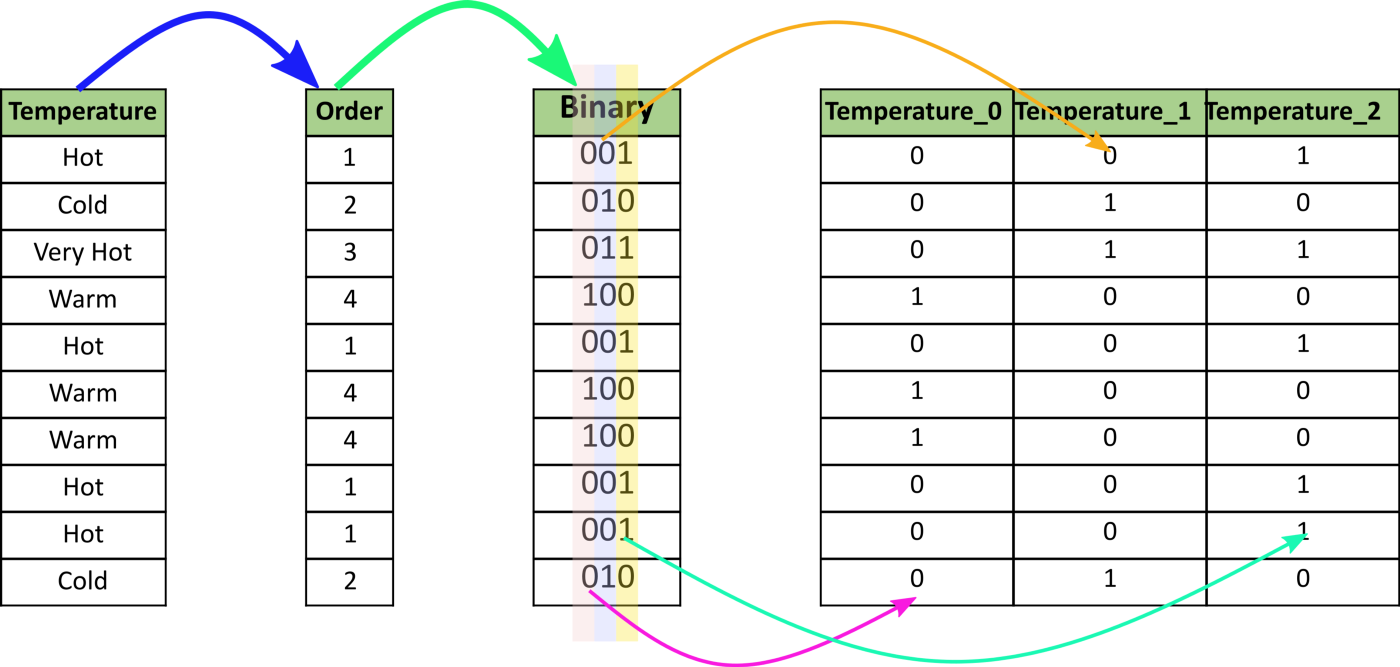

In [57]:
image_1 = Image.open('Binary.png')
image_1

In [41]:
#Import the libraries
import category_encoders as ce
import pandas as pd

#Create the Dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore',
                           'Delhi','Hyderabad','Mumbai','Agra']})

#Create object for binary encoding
encoder= ce.BinaryEncoder(cols=['City'],return_df=True)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [42]:
#Fit and Transform Data 
data_encoded=encoder.fit_transform(data) 
data_encoded

,City_0,City_1,City_2
0,0,0,1
1,0,1,0
2,0,1,1
3,1,0,0
4,1,0,1
5,0,0,1
6,0,1,1
7,0,1,0
8,1,1,0


- Binary encoding is a memory-efficient encoding scheme as it uses fewer features than one-hot encoding. Further, It reduces the curse of dimensionality for data with high cardinality.

# 7.Base N Encoding
Before diving into BaseN encoding let’s first try to understand what is Base here?

In the numeral system, the Base or the radix is the number of digits or a combination of digits and letters used to represent the numbers. The most common base we use in our life is 10  or decimal system as here we use 10 unique digits i.e 0 to 9 to represent all the numbers. Another widely used system is binary i.e. the base is 2. It uses 0 and 1 i.e 2 digits to express all the numbers.

For Binary encoding, the Base is 2 which means it converts the numerical values of a category into its respective Binary form. If you want to change the Base of encoding scheme you may use Base N encoder. In the case when categories are more and binary encoding is not able to handle the dimensionality then we can use a larger base such as 4 or 8.

In [46]:
#Import the libraries
import category_encoders as ce
import pandas as pd

#Create the dataframe
data=pd.DataFrame({'City':['Delhi','Mumbai','Hyderabad','Chennai','Bangalore','Delhi','Hyderabad','Mumbai','Agra']})

#Create an object for Base N Encoding
encoder= ce.BaseNEncoder(cols=['City'],return_df=True,base=5)

#Original Data
data

,City
0,Delhi
1,Mumbai
2,Hyderabad
3,Chennai
4,Bangalore
5,Delhi
6,Hyderabad
7,Mumbai
8,Agra


In [47]:
#Fit and Transform Data
data_encoded=encoder.fit_transform(data)
data_encoded

,City_0,City_1
0,0,1
1,0,2
2,0,3
3,0,4
4,1,0
5,0,1
6,0,3
7,0,2
8,1,1


- In the above example, I have used base 5 also known as the Quinary system. It is similar to the example of Binary encoding. While Binary encoding represents the same data by 4 new features the BaseN encoding uses only 3 new variables.

Hence BaseN encoding technique further reduces the number of features required to efficiently represent the data and improving memory usage. The default Base for Base N is 2 which is equivalent to Binary Encoding.